<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/support_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
print('class labels',np.unique(y))

class labels [0 1 2]


In [ ]:
sc=StandardScaler()
sc.fit(x)
X=sc.transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)
clf=SVC(C=1.0,kernel='rbf',random_state=None)
clf.fit(x_train,y_train)
print('train accuracy',metrics.accuracy_score(y_train,clf.predict(x_train)))
print('test  accuracy',metrics.accuracy_score(y_test,clf.predict(x_test)))
print('train confusion matrix',metrics.confusion_matrix(y_train,clf.predict(x_train)))
print('test confusion matrix',metrics.confusion_matrix(y_test,clf.predict(x_test)))
print('train classification report',metrics.classification_report(y_train,clf.predict(x_train)))
print('test classification report',metrics.classification_report(y_test,clf.predict(x_test)))


train accuracy 0.9583333333333334
test  accuracy 1.0
train confusion matrix [[39  0  0]
 [ 0 35  2]
 [ 0  3 41]]
test confusion matrix [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
train classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

test classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#drawing boundary of classifier
from sklearn.datasets import make_classification
X,y=make_classification(100,2,2,0,weights=[0.5,0.5],random_state=0)
clf1=SVC(kernel='linear',random_state=0)
clf1.fit(X,y)
w=clf1.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-5,5)
yy=a*xx-(clf1.intercept_[0])/w[1]
b=clf1.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=clf1.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_informative=2, n_redundant=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


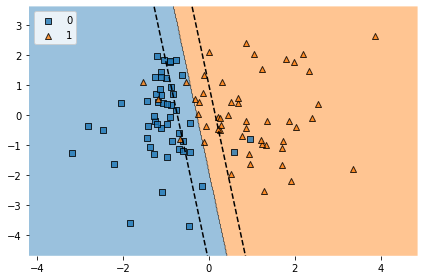

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y,clf=clf1)
plt.scatter(clf1.support_vectors_[:,0],clf1.support_vectors_[:,1],s=80,facecolors='none')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()